데이터마이닝 13주차 과제

2019312072

정주호


#Data Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_csv('ratings.csv')

movies = pd.read_csv('movies.csv')

In [4]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [5]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print(movies.head())

   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]


In [7]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [16]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


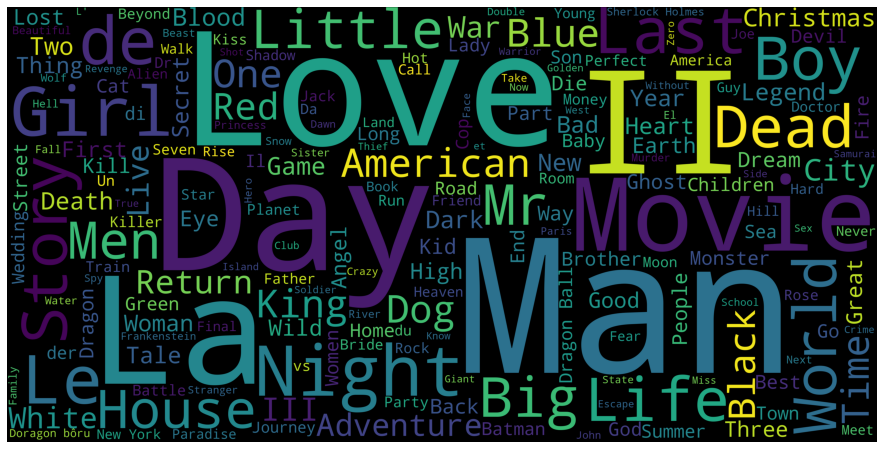

In [8]:

# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


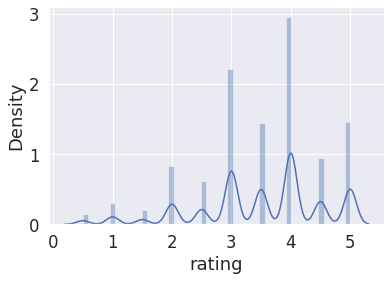

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [10]:

# Join all 2 files into one dataframe
dataset = pd.merge(movies, ratings)
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
56251,Eraserhead (1977),Drama|Horror,5.0
33888,Chasing Amy (1997),Comedy|Drama|Romance,5.0
20742,My Fair Lady (1964),Comedy|Drama|Musical|Romance,5.0
10168,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
10169,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
65379,Gosford Park (2001),Comedy|Drama|Mystery,5.0
10171,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
20739,My Fair Lady (1964),Comedy|Drama|Musical|Romance,5.0
10173,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
10174,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0


In [12]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

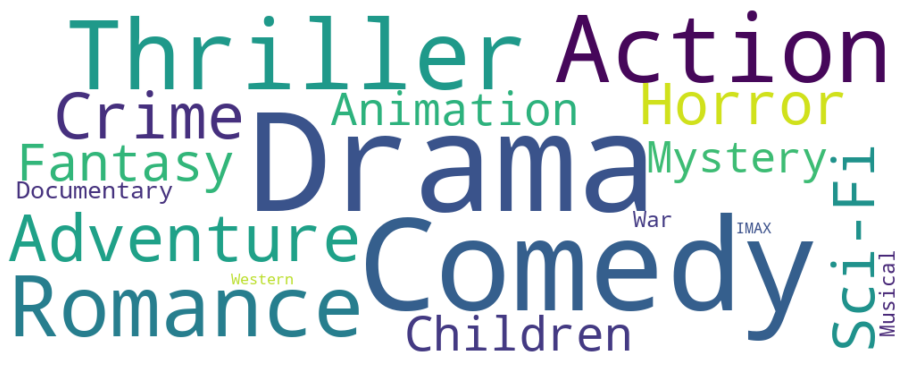

In [13]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#Recommend system


In [ ]:
! pip install surprise

     |████████████████████████████████| 11.8MB 8.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617646 sha256=2a992dccd86f86bd1c623a97219e61c3dc2aa387aa4c67d1a1cc9efa63439276
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split
import pandas as pd
from surprise import Reader, Dataset

In [ ]:
reader = Reader(rating_scale=(0.5,5.0))

In [ ]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=25,random_state=1234)

In [ ]:
algo = SVD(n_factors=50, biased=True, random_state=0)
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset)

In [ ]:
predictions[:5]

[Prediction(uid=247, iid=48516, r_ui=4.5, est=4.01186549764398, details={'was_impossible': False}),
 Prediction(uid=438, iid=7361, r_ui=4.0, est=3.992741152967262, details={'was_impossible': False}),
 Prediction(uid=318, iid=33903, r_ui=3.5, est=3.629068972025812, details={'was_impossible': False}),
 Prediction(uid=599, iid=2836, r_ui=2.0, est=2.7444081329416763, details={'was_impossible': False}),
 Prediction(uid=599, iid=2797, r_ui=3.5, est=3.166330252028918, details={'was_impossible': False})]

In [ ]:
accuracy.rmse(predictions)
accuracy.mse(predictions)

RMSE: 0.6545
MSE: 0.4283


0.4283133592034449

In [ ]:
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8684  0.8711  0.8751  0.8694  0.8797  0.8727  0.0042  
MAE (testset)     0.6662  0.6706  0.6735  0.6700  0.6734  0.6708  0.0027  
Fit time          3.17    3.19    3.14    3.18    3.17    3.17    0.01    
Test time         0.33    0.14    0.15    0.15    0.29    0.21    0.08    


{'fit_time': (3.1716620922088623,
  3.185426712036133,
  3.143162488937378,
  3.1772892475128174,
  3.168584108352661),
 'test_mae': array([0.66623556, 0.67063689, 0.67352656, 0.6700358 , 0.67339977]),
 'test_rmse': array([0.86836446, 0.8711069 , 0.87505184, 0.86938695, 0.87965789]),
 'test_time': (0.33264851570129395,
  0.14383983612060547,
  0.1476585865020752,
  0.15049982070922852,
  0.28620457649230957)}

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs' : [20,40,60], 'n_factors': [50,100,200]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'],cv=3)

In [ ]:
gs.fit(data)

In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8786938787717459
{'n_epochs': 20, 'n_factors': 50}
